In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
loc = '/content/drive/My Drive/project photos/project'

In [ ]:
import os
label = []
for i in os.listdir(loc):
  if(i.split('.')[0]== 'non_defective'):
    label.append(0)
  elif(i.split('.')[0]== 'Copy of non_defective'):
    label.append(0)
  else:
    label.append(1)

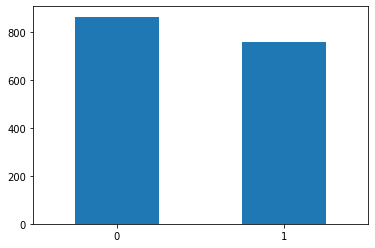

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
label = pd.DataFrame(label)
label[0].value_counts().plot.bar(rot=0)

In [ ]:
label.shape

(1626, 1)

In [ ]:
from tqdm import tqdm
features = []
for i in tqdm(os.listdir(loc)):
  path = os.path.join(loc,i)
  f = cv2.imread(path)
  fr = cv2.resize(f,(70,70))
  features.append(fr)

100%|██████████| 1626/1626 [07:06<00:00,  3.81it/s]


In [ ]:
 import numpy as np
X = np.array(features)
Y = np.array(label)
y = np.array(label)

In [ ]:
X.shape

(1626, 70, 70, 3)

In [ ]:
Xt = X.reshape(1626,14700)

In [ ]:
Xt = Xt/Xt.max()

In [ ]:
Xt.shape[1]

14700

In [ ]:
import keras
from keras import layers
from keras.utils import to_categorical

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(200, activation = 'relu' , input_dim = Xt.shape[1]))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [ ]:
Yt = to_categorical(Y)

In [ ]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
pd.DataFrame(Yt).to_csv('detection_features.csv')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 200)               2940200   
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 202       
Total params: 2,960,502
Trainable params: 2,960,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,test_size=0.25,random_state =1)

In [ ]:
xtrain.shape

(1219, 14700)

In [ ]:
ytrain.shape

(1219, 2)

In [ ]:
f= model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8408 - accuracy: 0.5209
Epoch 2/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6789 - accuracy: 0.5652
Epoch 3/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6706 - accuracy: 0.5849
Epoch 4/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6541 - accuracy: 0.6038
Epoch 5/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6451 - accuracy: 0.6284
Epoch 6/15
39/39 [==============================] - 1s 14ms/step - loss: 0.7252 - accuracy: 0.5660
Epoch 7/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6531 - accuracy: 0.6136
Epoch 8/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6533 - accuracy: 0.6366
Epoch 9/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6475 - accuracy: 0.6358
Epoch 10/15
39/39 [==============================] - 1s 14ms/step - loss: 0.6379 - accuracy: 0.6399
Epoch 11/

In [ ]:
model.evaluate(xtest,ytest)

13/13 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.6683


[0.6065187454223633, 0.6683046817779541]

In [ ]:
 model.save('detector.h5')

In [ ]:
p = ['non_defective','defective']

In [ ]:
k = cv2.imread('/content/test1.jpg')
kt = cv2.resize(k,(70,70))
model.predict(kt.reshape(1,14700))

array([[1., 0.]], dtype=float32)

In [ ]:
p[np.argmax(model.predict(kt.reshape(1,14700)))]

'non_defective'

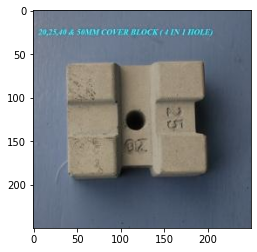

In [ ]:
plt.imshow(k)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 68, 68, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
model1.save('detector_CNN.h5')

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Yt,test_size=0.25,random_state =1)

In [ ]:
model1.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
39/39 [==============================] - 14s 357ms/step - loss: 0.8511 - accuracy: 0.7711
Epoch 2/15
39/39 [==============================] - 15s 380ms/step - loss: 0.3505 - accuracy: 0.8811
Epoch 3/15
39/39 [==============================] - 14s 367ms/step - loss: 0.2510 - accuracy: 0.9188
Epoch 4/15
39/39 [==============================] - 14s 368ms/step - loss: 0.2023 - accuracy: 0.9278
Epoch 5/15
39/39 [==============================] - 14s 360ms/step - loss: 0.1903 - accuracy: 0.9336
Epoch 6/15
39/39 [==============================] - 14s 358ms/step - loss: 0.1314 - accuracy: 0.9532
Epoch 7/15
39/39 [==============================] - 14s 359ms/step - loss: 0.1308 - accuracy: 0.9500
Epoch 8/15
39/39 [==============================] - 14s 359ms/step - loss: 0.1166 - accuracy: 0.9614
Epoch 9/15
39/39 [==============================] - 14s 361ms/step - loss: 0.1169 - accuracy: 0.9565
Epoch 10/15
39/39 [==============================] - 14s 359ms/step - loss: 0.0853 - accura

In [ ]:
model1.evaluate(xtest,ytest)

13/13 [==============================] - 1s 73ms/step - loss: 0.2002 - accuracy: 0.9189


[0.20022226870059967, 0.9189189076423645]

In [ ]:
k = cv2.imread('/content/defective.216.jpg')
kt = cv2.resize(k,(70,70))
model1.predict(kt.reshape(1,70,70,3))

array([[0.02427856, 0.9757214 ]], dtype=float32)

In [ ]:
p[np.argmax(model1.predict(kt.reshape(1,70,70,3)))]

'defective'

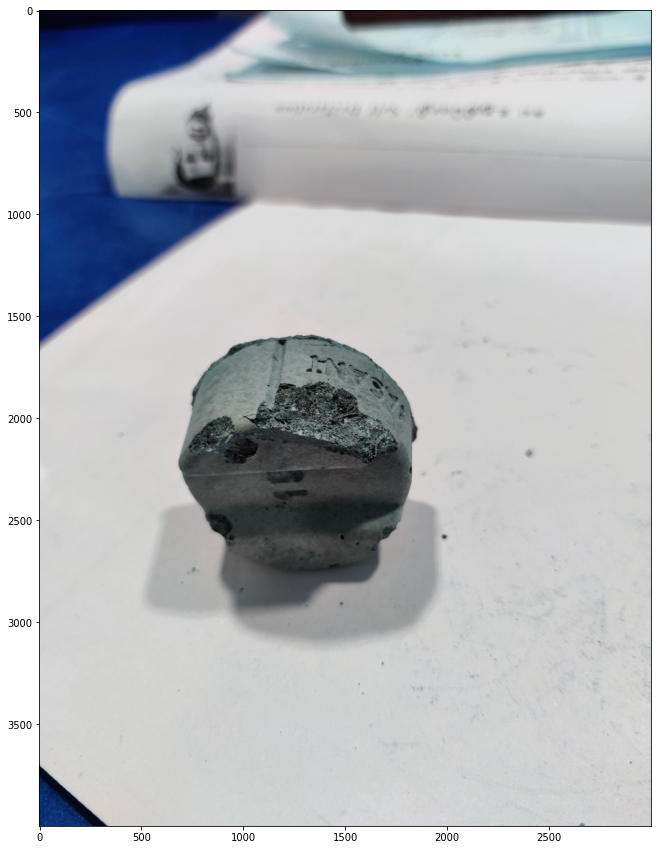

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(k)
plt.show()

In [ ]:
k1 = cv2.imread('/content/test1.jpg')
kt1 = cv2.resize(k1,(70,70))
model1.predict(kt1.reshape(1,70,70,3))

array([[1.000000e+00, 7.398977e-17]], dtype=float32)

In [ ]:
p[np.argmax(model1.predict(kt1.reshape(1,70,70,3)))]

'non_defective'

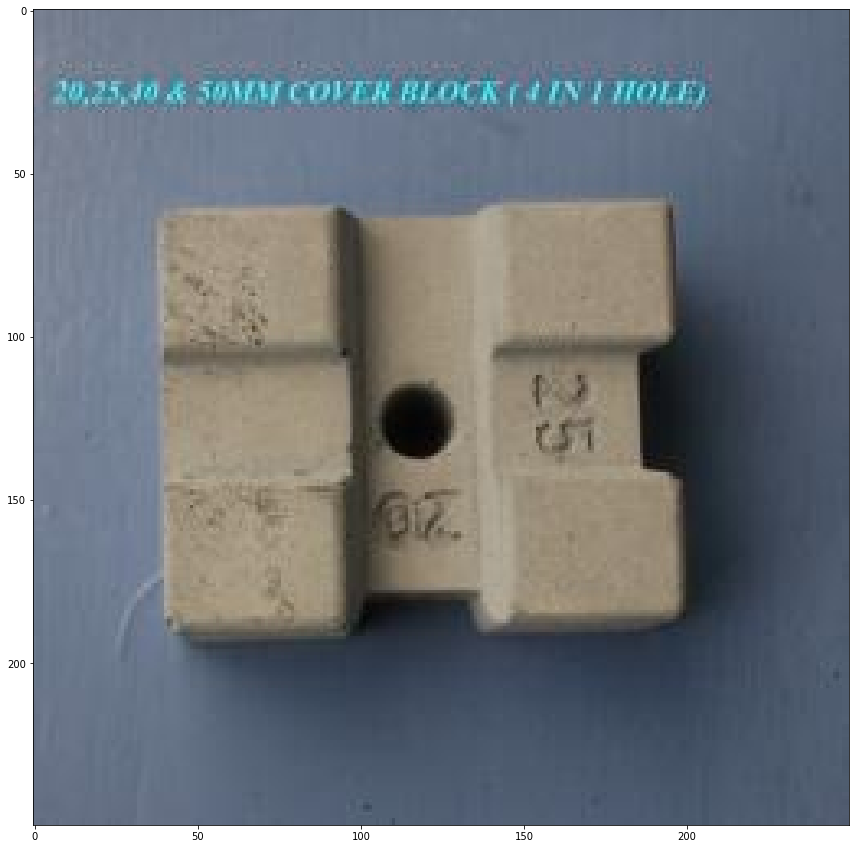

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(k1)
plt.show()

[[0.22637643 0.7736236 ]]
defective


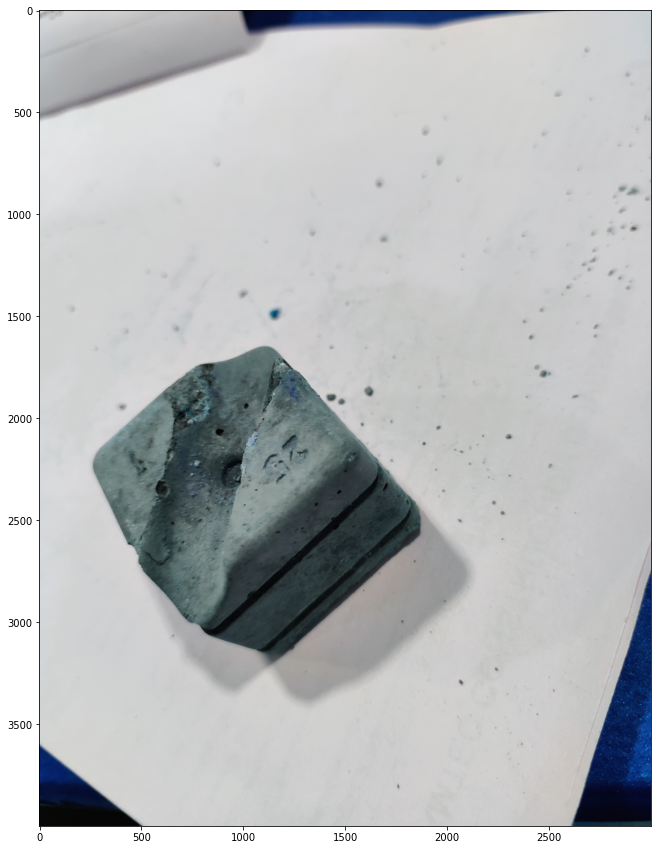

In [ ]:
k3 = cv2.imread('/content/defective.71.jpg')
kt = cv2.resize(k3,(70,70))
print(model1.predict(kt.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k3)
plt.show()

[[9.999597e-01 4.034819e-05]]
non_defective


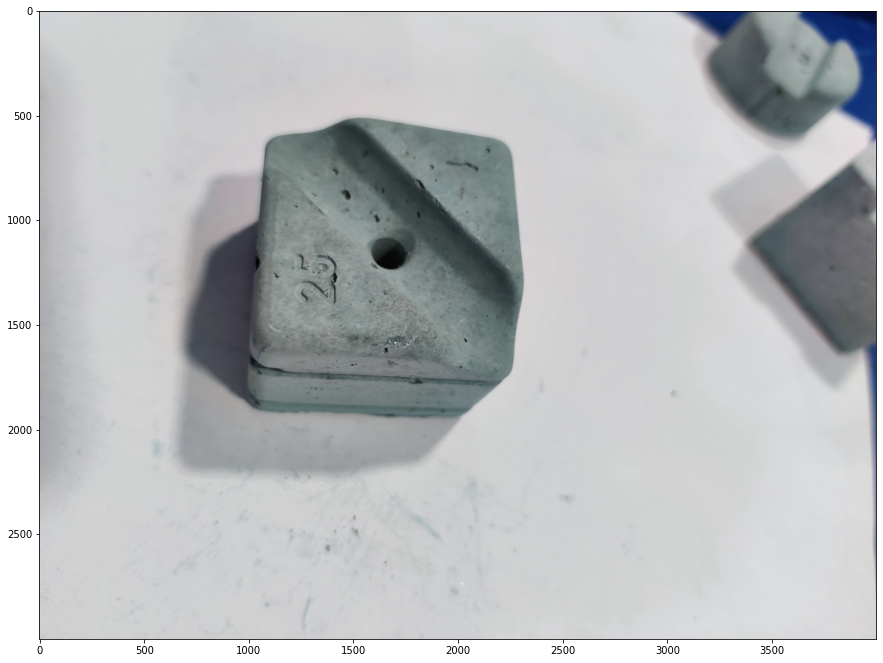

In [ ]:
k4 = cv2.imread('/content/non_defective.208.jpg')
kt4 = cv2.resize(k4,(70,70))
print(model1.predict(kt4.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt4.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k4)
plt.show()

[[0.01681828 0.9831818 ]]
defective


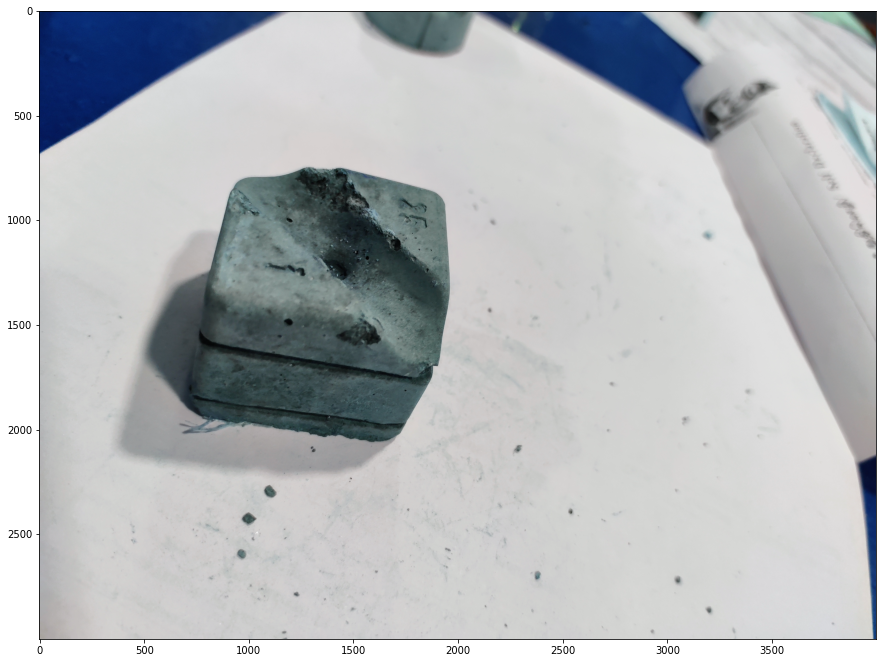

In [ ]:
k5 = cv2.imread('/content/defective.27.jpg')
kt5 = cv2.resize(k5,(70,70))
print(model1.predict(kt5.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt5.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k5)
plt.show()

[[0.34448516 0.65551484]]
defective


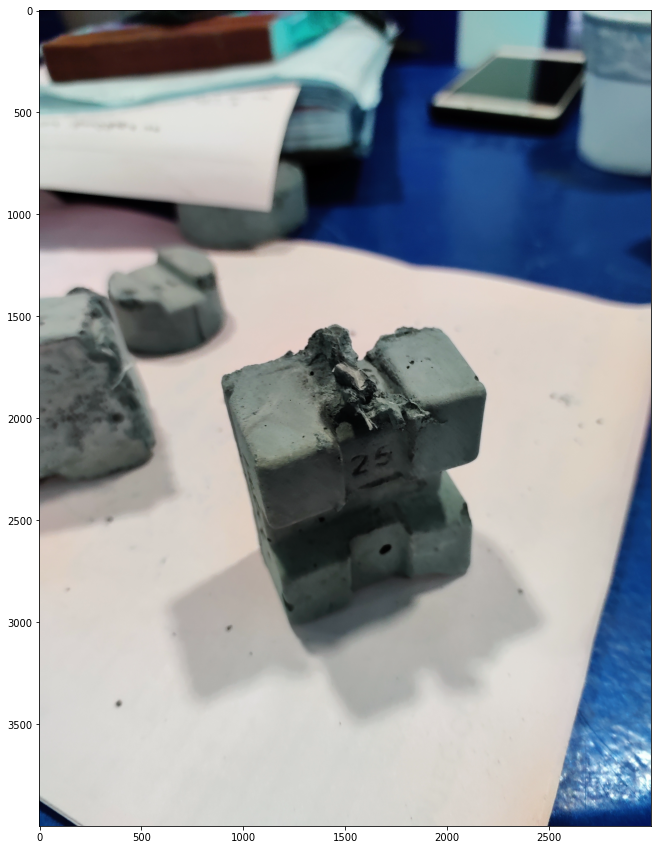

In [ ]:
k6 = cv2.imread('/content/defective.600.jpg')
kt6 = cv2.resize(k6,(70,70))
print(model1.predict(kt6.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt6.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k6)
plt.show()

[[0.6242671 0.3757329]]
non_defective


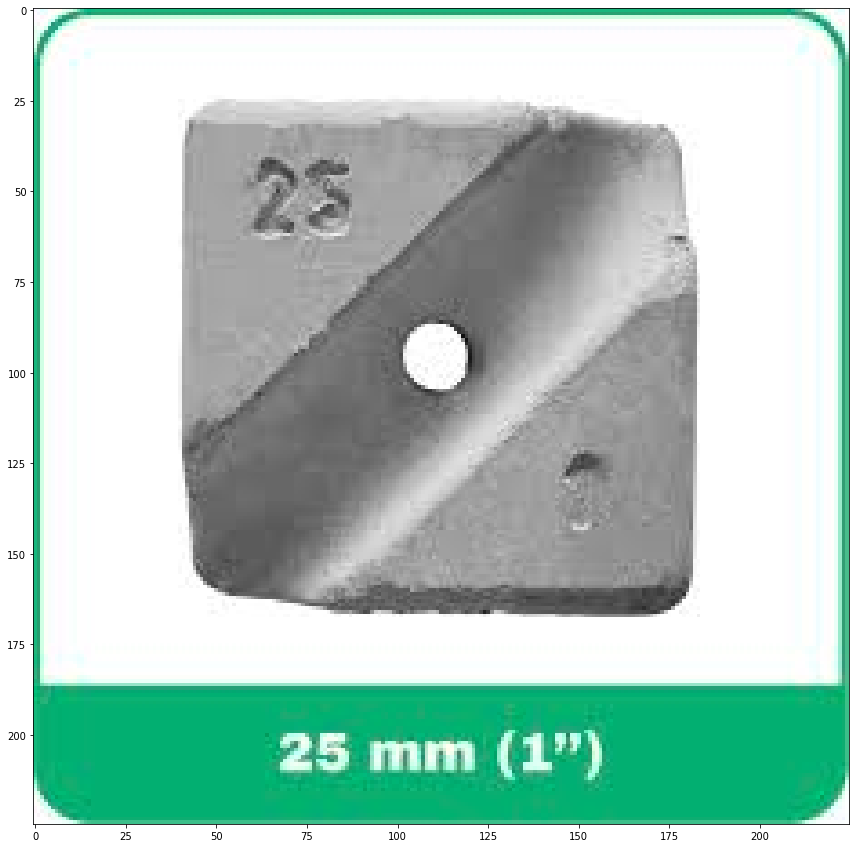

In [ ]:
k7 = cv2.imread('/content/test3.jpg')
kt7 = cv2.resize(k7,(70,70))
print(model1.predict(kt7.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt7.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k7)
plt.show()

[[0.7350875 0.2649125]]
non_defective


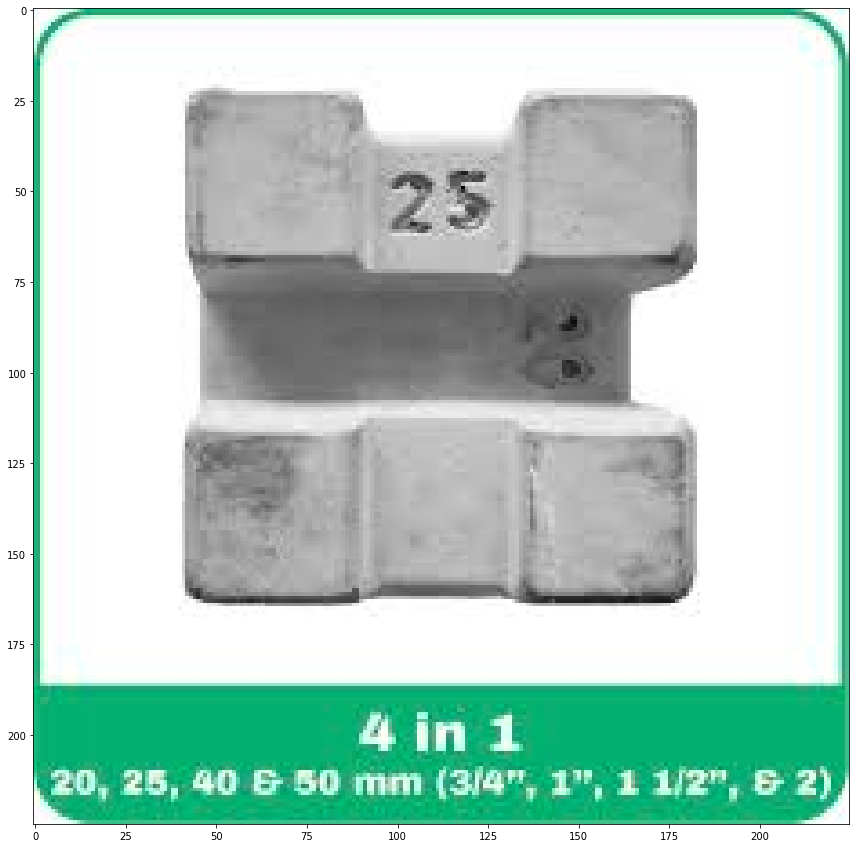

In [ ]:
k8 = cv2.imread('/content/test2.jpg')
kt8 = cv2.resize(k8,(70,70))
print(model1.predict(kt8.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt8.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k8)
plt.show()

[[9.999254e-01 7.463099e-05]]
non_defective


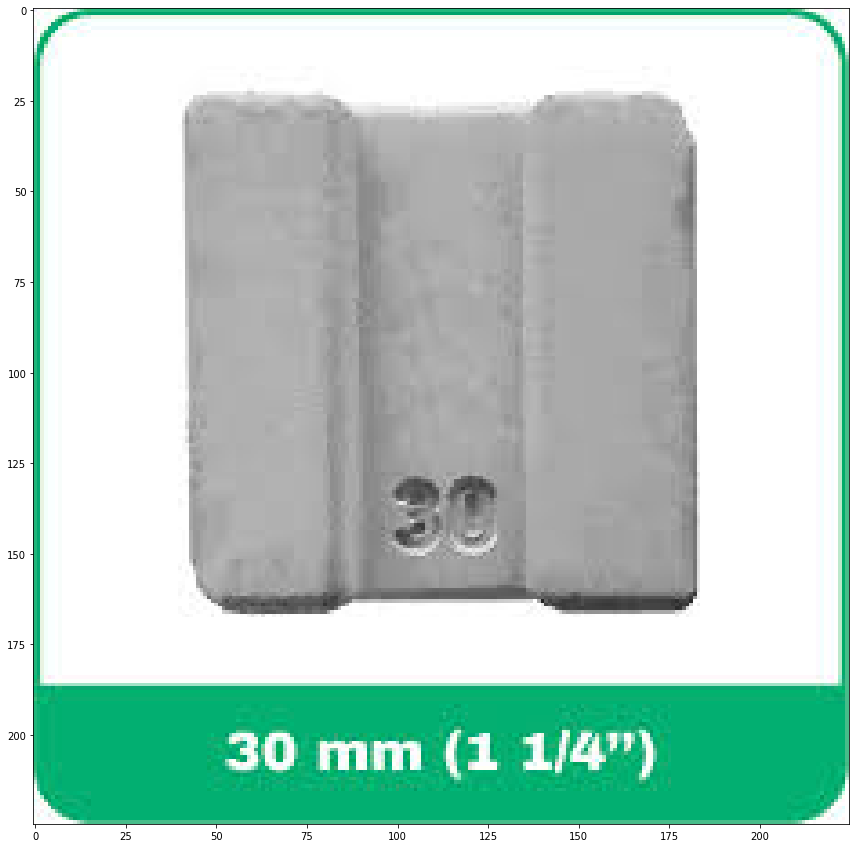

In [ ]:
k9 = cv2.imread('/content/test4.jpg')
kt9 = cv2.resize(k9,(70,70))
print(model1.predict(kt9.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt9.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k9)
plt.show()

[[0.3533477  0.64665234]]
defective


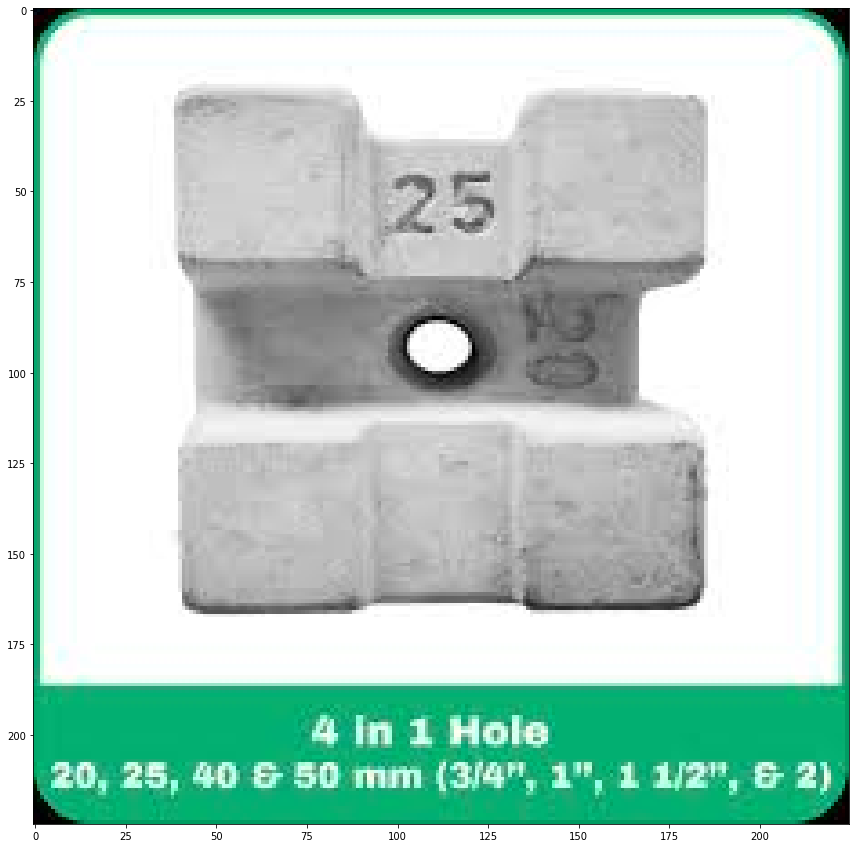

In [ ]:
k10 = cv2.imread('/content/test10.jpg')
kt10 = cv2.resize(k10,(70,70))
print(model1.predict(kt10.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt10.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k10)
plt.show()

[[0.8698268  0.13017318]]
non_defective


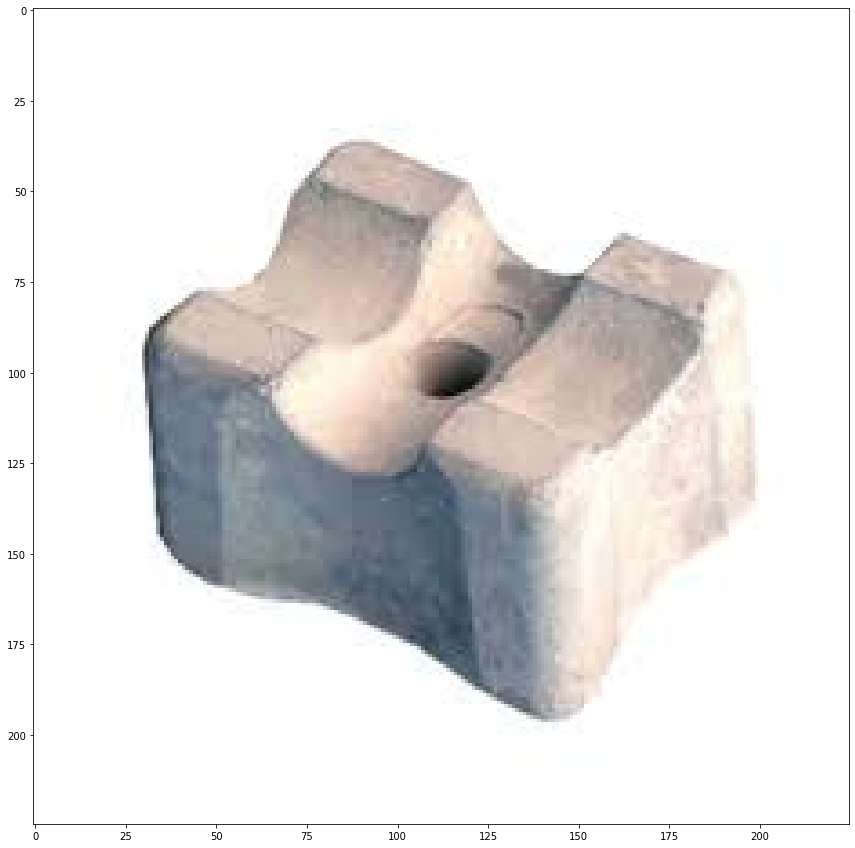

In [ ]:
k10 = cv2.imread('/content/test6.jpg')
kt10 = cv2.resize(k10,(70,70))
print(model1.predict(kt10.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt10.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k10)
plt.show()

[[0.17868493 0.82131505]]
defective


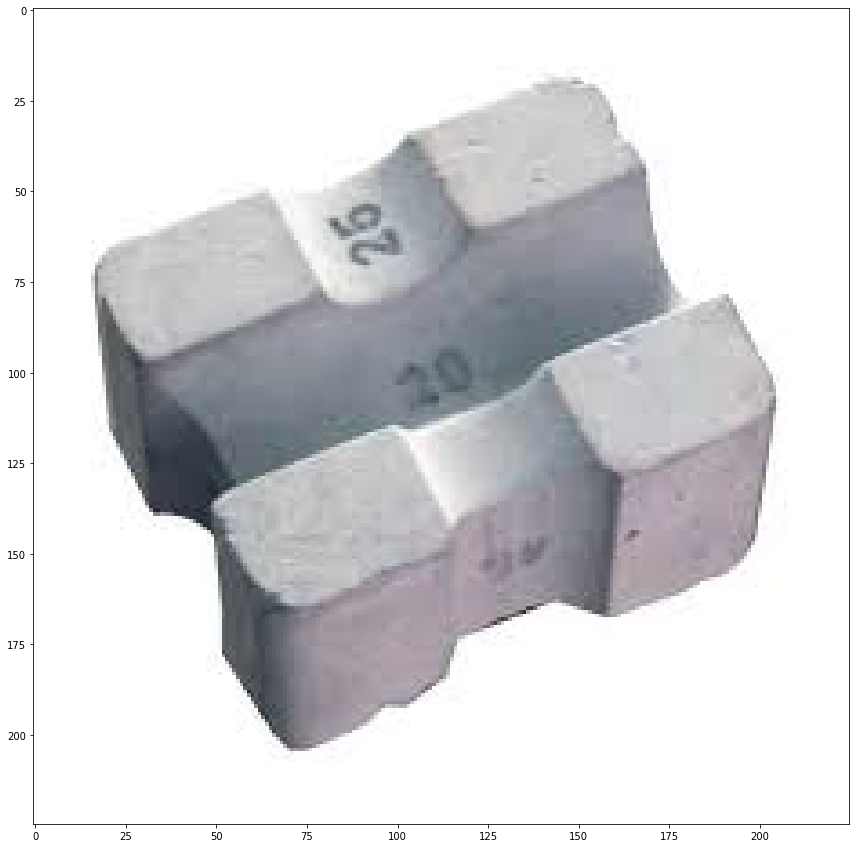

In [ ]:
k10 = cv2.imread('/content/test7.jpg')
kt10 = cv2.resize(k10,(70,70))
print(model1.predict(kt10.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt10.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k10)
plt.show()

[[9.9999928e-01 7.1638533e-07]]
non_defective


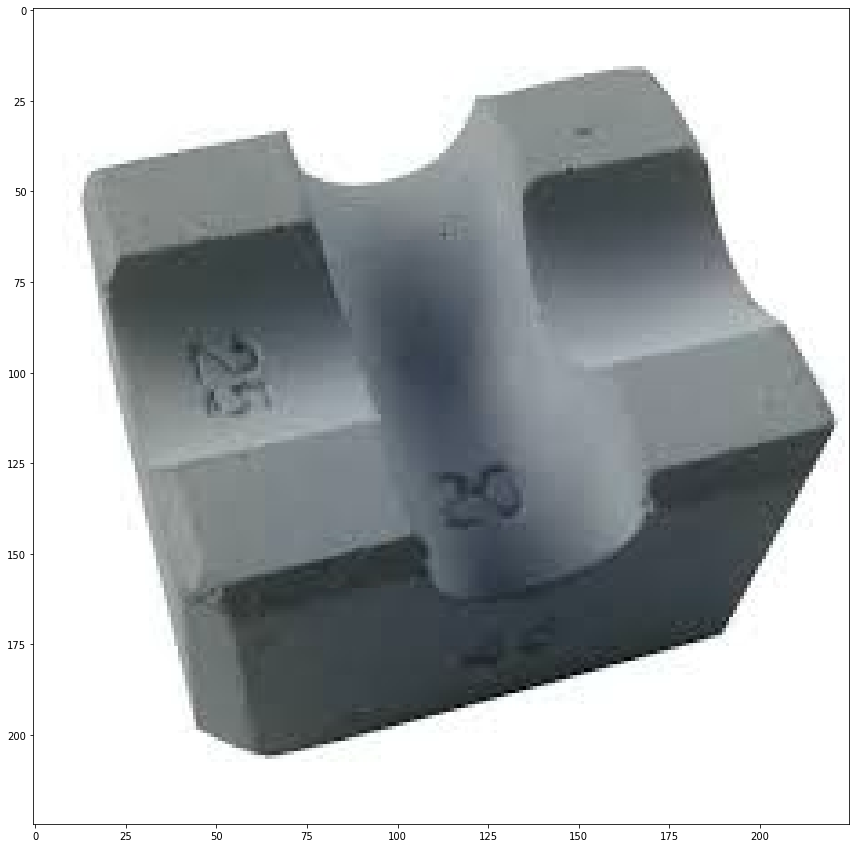

In [ ]:
k11 = cv2.imread('/content/test9.jpg')
kt11 = cv2.resize(k11,(70,70))
print(model1.predict(kt11.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt11.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k11)
plt.show()

[[0.76733685 0.23266308]]
non_defective


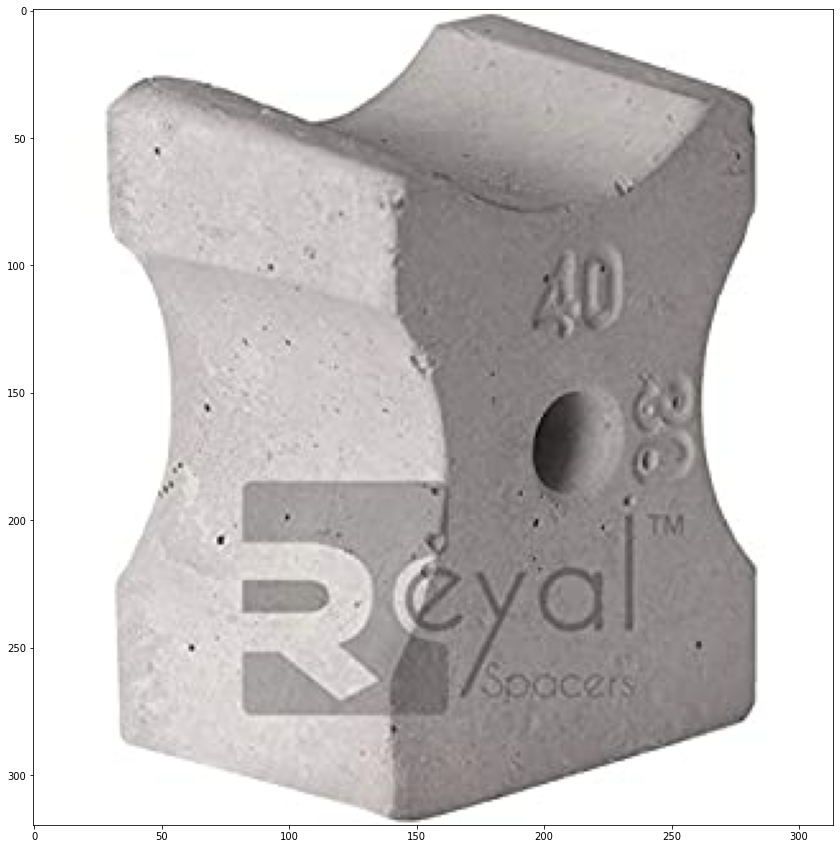

In [ ]:
k12 = cv2.imread('/content/test5.jpg')
kt12 = cv2.resize(k12,(70,70))
print(model1.predict(kt12.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt12.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k12)
plt.show()

[[9.999597e-01 4.034819e-05]]
non_defective


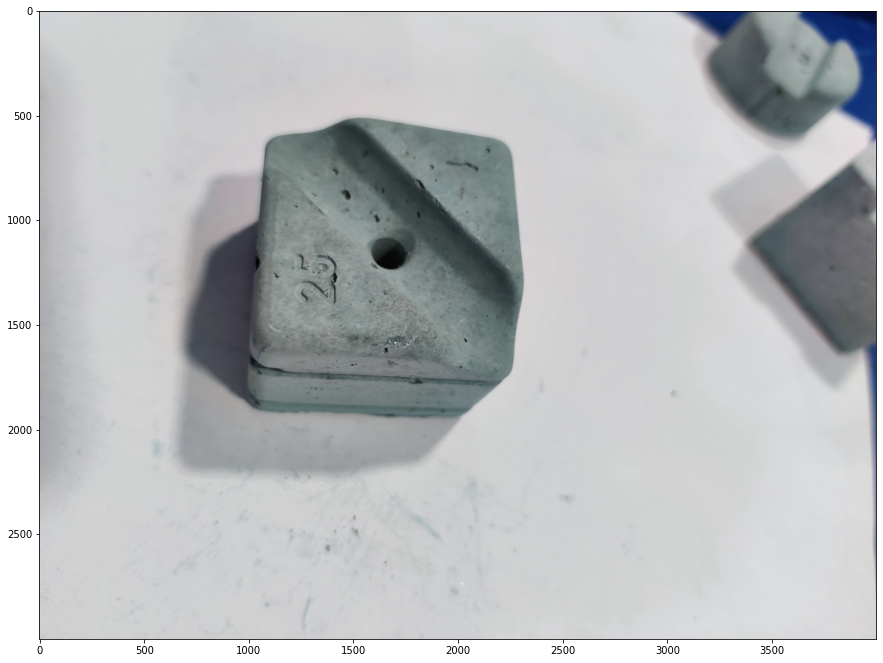

In [ ]:
k13 = cv2.imread('/content/non_defective.208.jpg')
kt13 = cv2.resize(k13,(70,70))
print(model1.predict(kt13.reshape(1,70,70,3)))
print(p[np.argmax(model1.predict(kt13.reshape(1,70,70,3)))])
plt.figure(figsize=(15,15))
plt.imshow(k13)
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


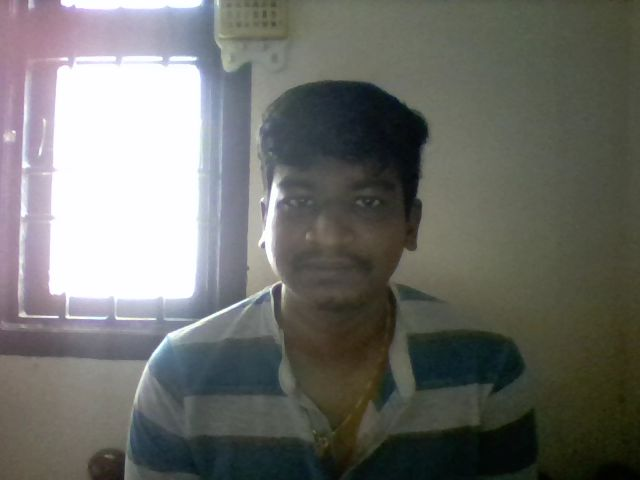

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))